In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [45]:
import seaborn as sns

In [46]:
df = pd.read_csv("case_malaysia.csv")

In [47]:
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.shape

(626, 19)

In [49]:
df.dtypes

date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cases_active                 int64
cases_cluster              float64
cases_pvax                 float64
cases_fvax                 float64
cases_child                float64
cases_adolescent           float64
cases_adult                float64
cluster_elderly            float64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_HighRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object

In [50]:
# check if any null value is present
df.isnull().values.any()

True

In [51]:
df.isnull().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                3
cases_pvax                   3
cases_fvax                   3
cases_child                  3
cases_adolescent             3
cases_adult                  3
cluster_elderly              3
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_HighRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

### Feature Engineering
#### Missing Values

In [52]:
df.columns

Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_pvax', 'cases_fvax', 'cases_child',
       'cases_adolescent', 'cases_adult', 'cluster_elderly', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_HighRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'],
      dtype='object')

In [53]:
df.isnull().mean().sort_values(ascending=True)

date                       0.000000
cases_new                  0.000000
cases_import               0.000000
cases_recovered            0.000000
cases_active               0.000000
cluster_elderly            0.004792
cases_adult                0.004792
cases_child                0.004792
cases_adolescent           0.004792
cases_pvax                 0.004792
cases_cluster              0.004792
cases_fvax                 0.004792
cluster_detentionCentre    0.546326
cluster_import             0.546326
cluster_religious          0.546326
cluster_community          0.546326
cluster_HighRisk           0.546326
cluster_education          0.546326
cluster_workplace          0.546326
dtype: float64

#### Compute the frequency with every feature

<AxesSubplot:>

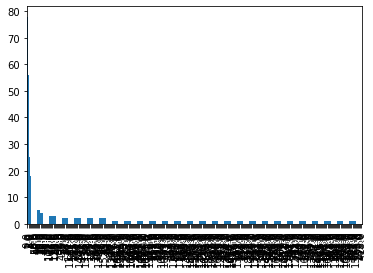

In [54]:
df['cluster_elderly'].value_counts().plot.bar()

<AxesSubplot:>

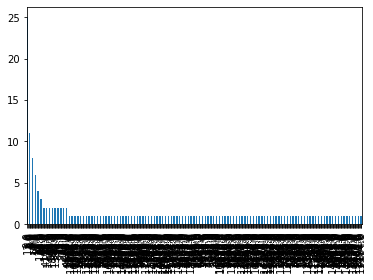

In [55]:
df['cases_adult'].value_counts().plot.bar()

<AxesSubplot:>

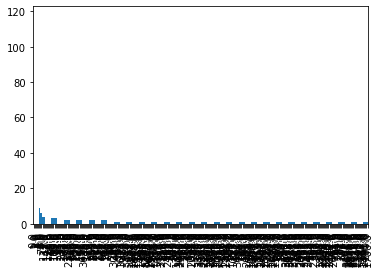

In [56]:
df['cases_child'].value_counts().plot.bar()

<AxesSubplot:>

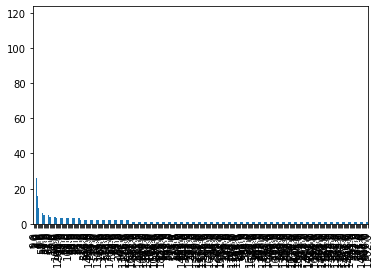

In [57]:
df['cases_adolescent'].value_counts().plot.bar()

<AxesSubplot:>

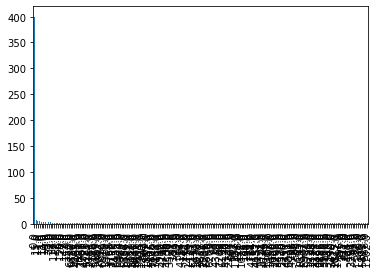

In [58]:
df['cases_pvax'].value_counts().plot.bar()

<AxesSubplot:>

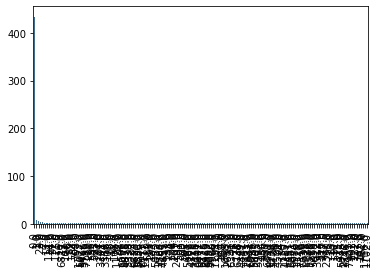

In [59]:
df['cases_fvax'].value_counts().plot.bar()

<AxesSubplot:>

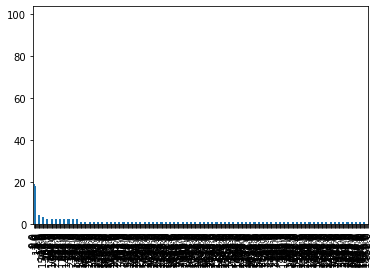

In [60]:
df['cases_cluster'].value_counts().plot.bar()

<AxesSubplot:>

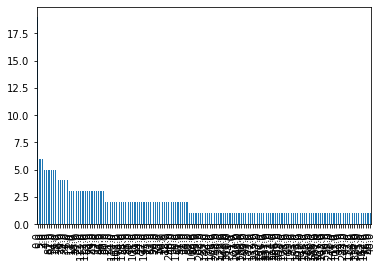

In [61]:
df['cluster_detentionCentre'].value_counts().plot.bar()

<AxesSubplot:>

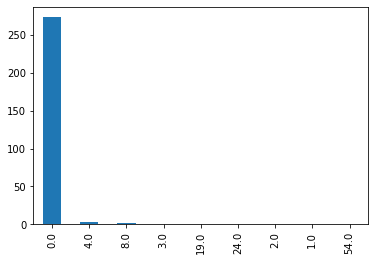

In [62]:
df['cluster_import'].value_counts().plot.bar()

<AxesSubplot:>

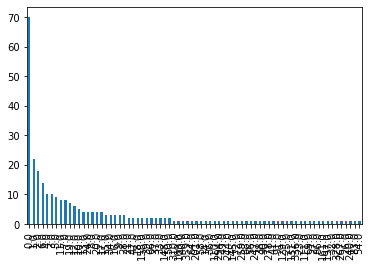

In [63]:
df['cluster_religious'].value_counts().plot.bar()

<AxesSubplot:>

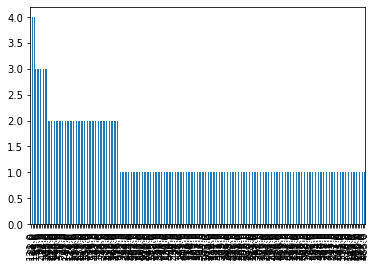

In [64]:
df['cluster_community'].value_counts().plot.bar()

<AxesSubplot:>

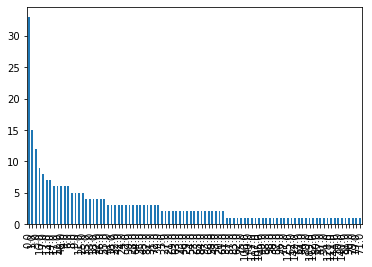

In [65]:
df['cluster_HighRisk'].value_counts().plot.bar()

<AxesSubplot:>

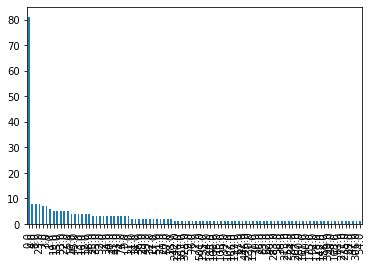

In [66]:
df['cluster_education'].value_counts().plot.bar()

<AxesSubplot:>

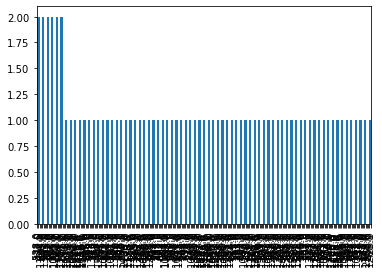

In [67]:
df['cluster_workplace'].value_counts().plot.bar()

In [68]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [69]:
for feature in ['cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace','cluster_elderly',
'cases_adult', 'cases_child' , 'cases_adolescent', 'cases_pvax', 'cases_cluster', 'cases_fvax']:
    impute_nan(df,feature)

In [70]:
df.isnull().mean()

date                       0.0
cases_new                  0.0
cases_import               0.0
cases_recovered            0.0
cases_active               0.0
cases_cluster              0.0
cases_pvax                 0.0
cases_fvax                 0.0
cases_child                0.0
cases_adolescent           0.0
cases_adult                0.0
cluster_elderly            0.0
cluster_import             0.0
cluster_religious          0.0
cluster_community          0.0
cluster_HighRisk           0.0
cluster_education          0.0
cluster_detentionCentre    0.0
cluster_workplace          0.0
dtype: float64

In [71]:
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
1,26/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
2,27/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
3,28/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
4,29/1/2020,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0


In [72]:
dataset=df.drop(['date'], axis=1)

In [73]:
dataset.head()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
1,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
2,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
3,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
4,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,181.0


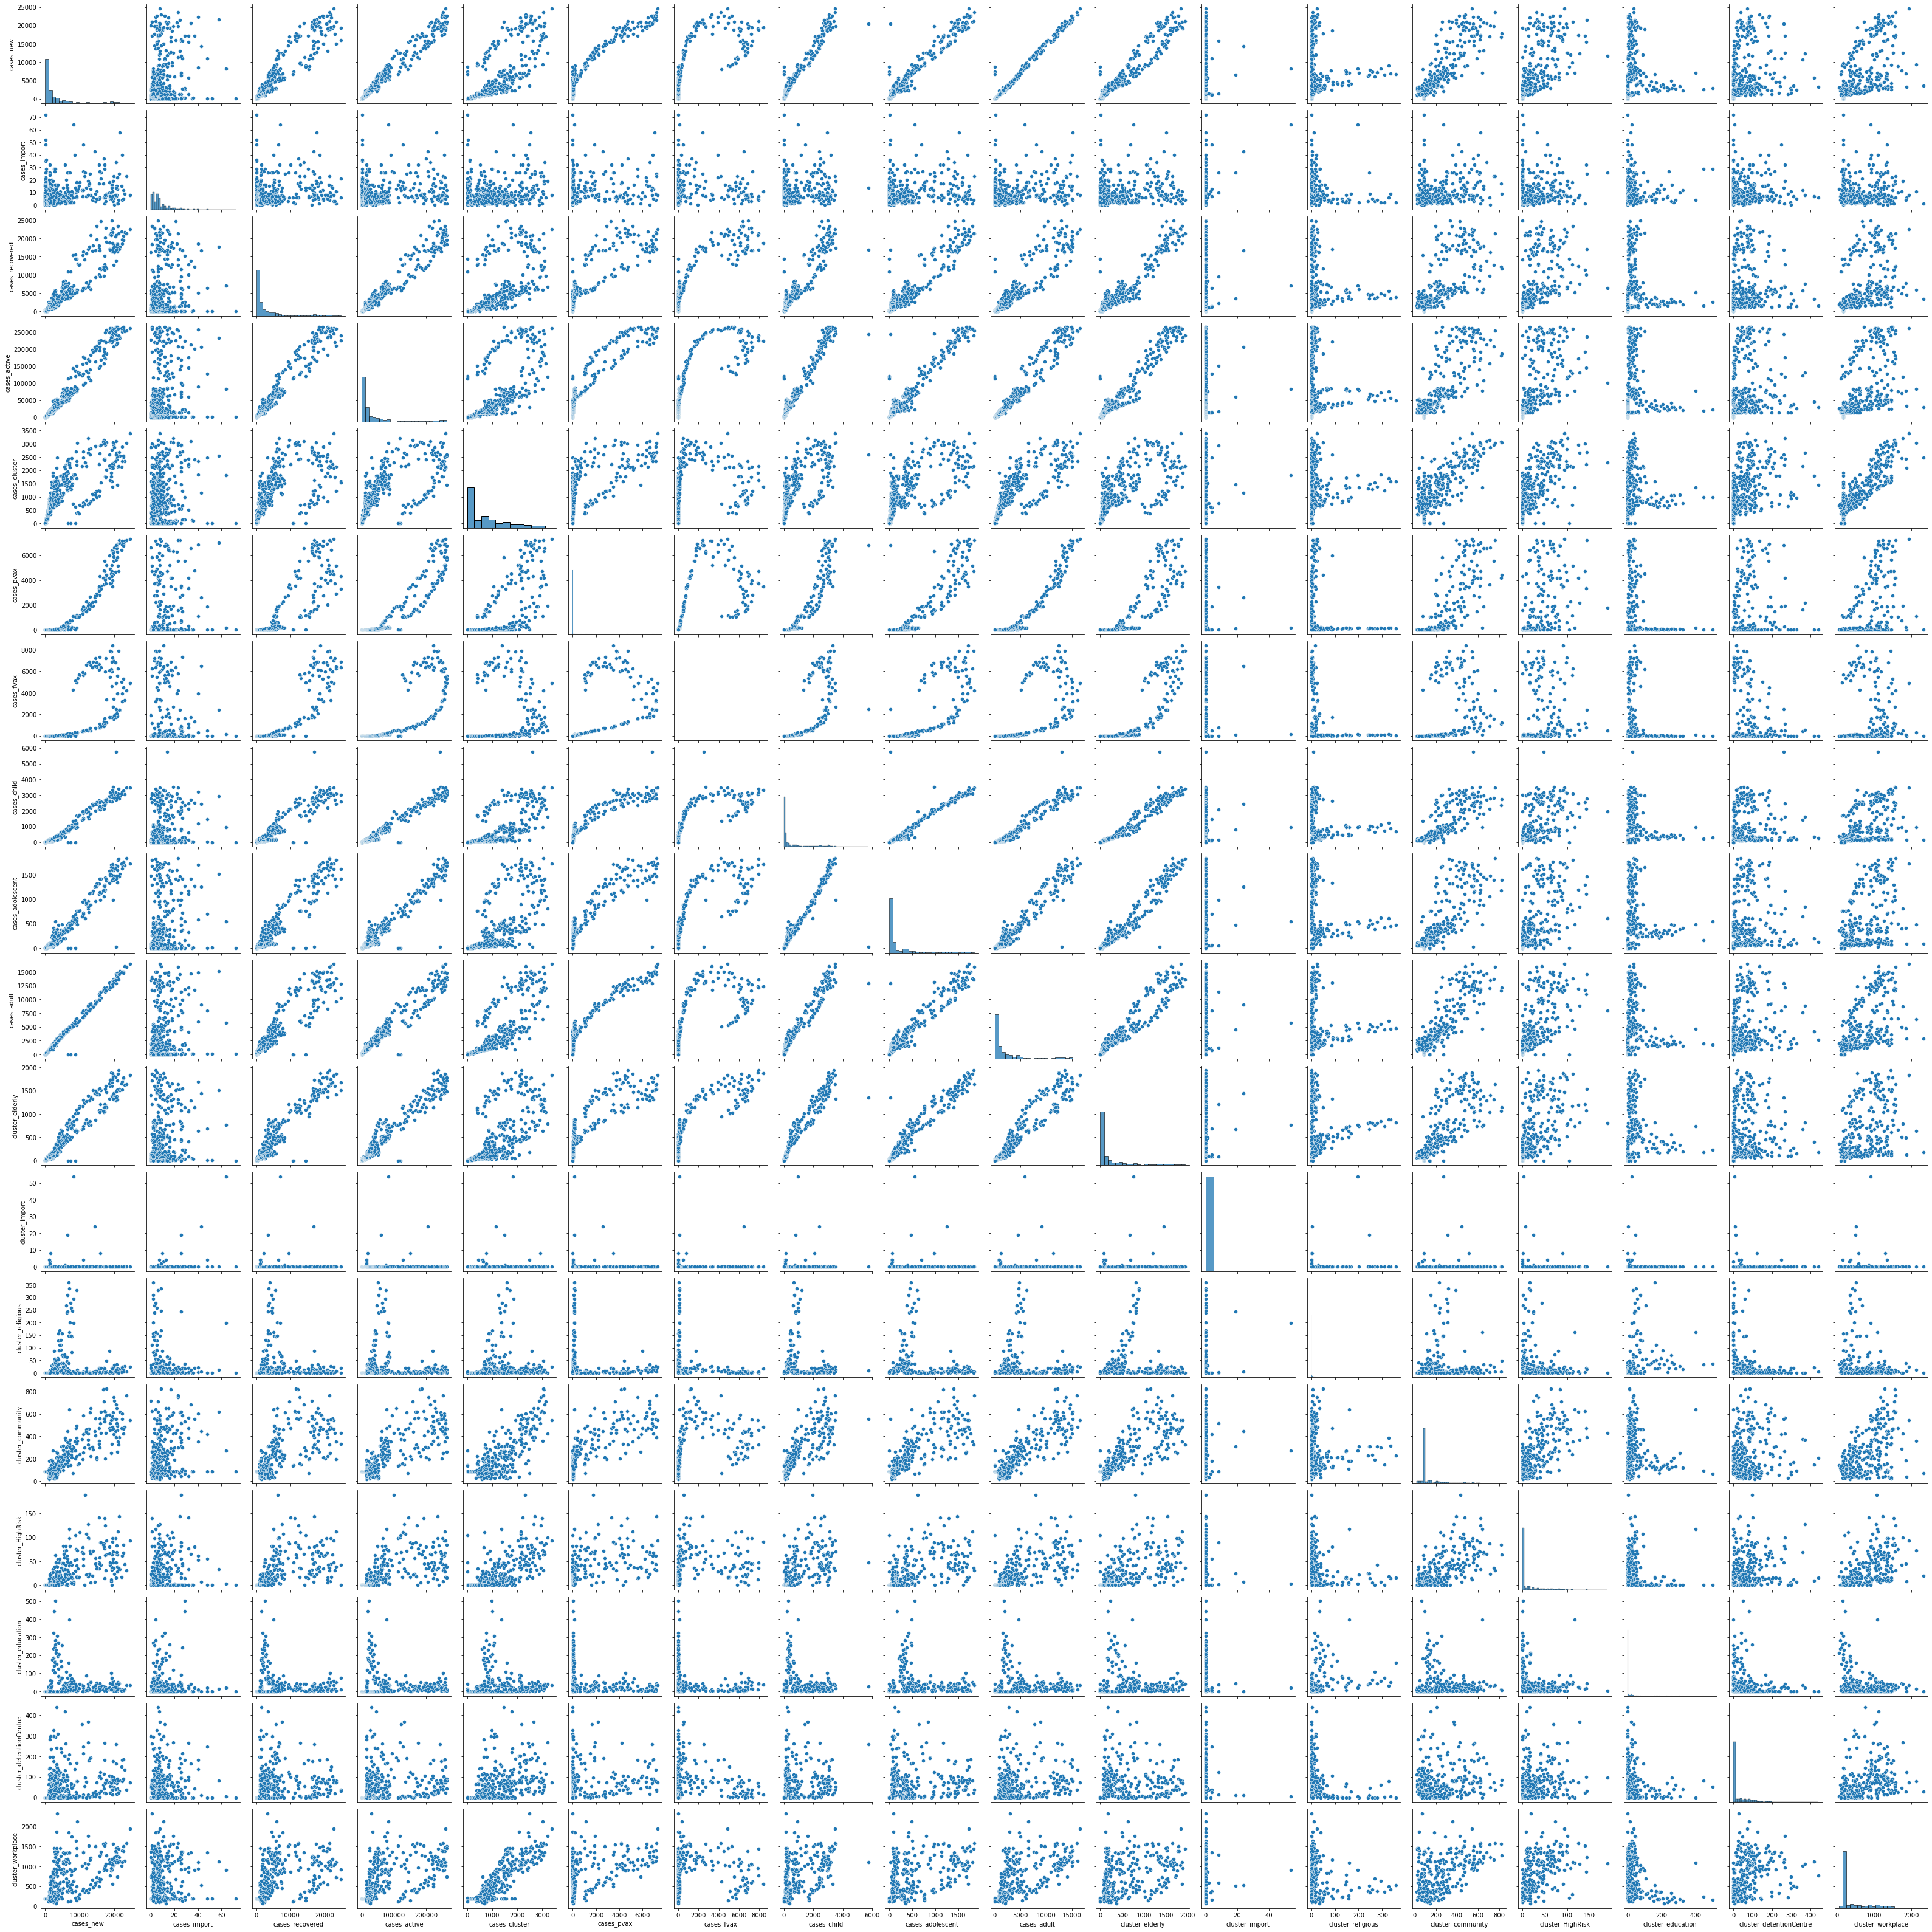

In [74]:
sns.pairplot(dataset)

In [75]:
dataset.corr()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
cases_new,1.000000,0.300914,0.951780,0.986779,0.818865,0.927165,0.762766,0.978755,0.973011,0.994312,0.971069,0.067310,0.168361,0.894175,0.740454,0.147322,0.395140,0.712111
cases_import,0.300914,1.000000,0.246583,0.281867,0.266829,0.280358,0.168032,0.291705,0.289290,0.305208,0.274347,0.326517,0.017066,0.338470,0.246167,0.131284,0.183704,0.196689
cases_recovered,0.951780,0.246583,1.000000,0.978973,0.698314,0.863561,0.873344,0.945361,0.946796,0.931679,0.958569,0.058077,0.097324,0.778888,0.659718,0.110665,0.309480,0.626199
cases_active,0.986779,0.281867,0.978973,1.000000,0.760318,0.916819,0.821817,0.976255,0.969717,0.974067,0.971602,0.062833,0.115778,0.850270,0.707316,0.113492,0.357801,0.671402
cases_cluster,0.818865,0.266829,0.698314,0.760318,1.000000,0.678942,0.382611,0.746431,0.739935,0.843743,0.743714,0.076816,0.233356,0.799986,0.725800,0.179687,0.573379,0.887174
cases_pvax,0.927165,0.280358,0.863561,0.916819,0.678942,1.000000,0.693585,0.928900,0.907842,0.928368,0.868343,0.011342,-0.001398,0.830519,0.624168,0.042629,0.302622,0.591650
cases_fvax,0.762766,0.168032,0.873344,0.821817,0.382611,0.693585,1.000000,0.813230,0.823609,0.737521,0.845622,0.036825,-0.041630,0.549333,0.434831,0.041025,0.096314,0.340563
cases_child,0.978755,0.291705,0.945361,0.976255,0.746431,0.928900,0.813230,1.000000,0.958847,0.973559,0.970919,0.060346,0.134330,0.872581,0.695184,0.128911,0.342296,0.639896
cases_adolescent,0.973011,0.289290,0.946796,0.969717,0.739935,0.907842,0.823609,0.958847,1.000000,0.969678,0.976913,0.066070,0.159620,0.855416,0.676211,0.195751,0.313698,0.626447
cases_adult,0.994312,0.305208,0.931679,0.974067,0.843743,0.928368,0.737521,0.973559,0.969678,1.000000,0.965367,0.068527,0.172018,0.897321,0.737422,0.142482,0.419316,0.735680


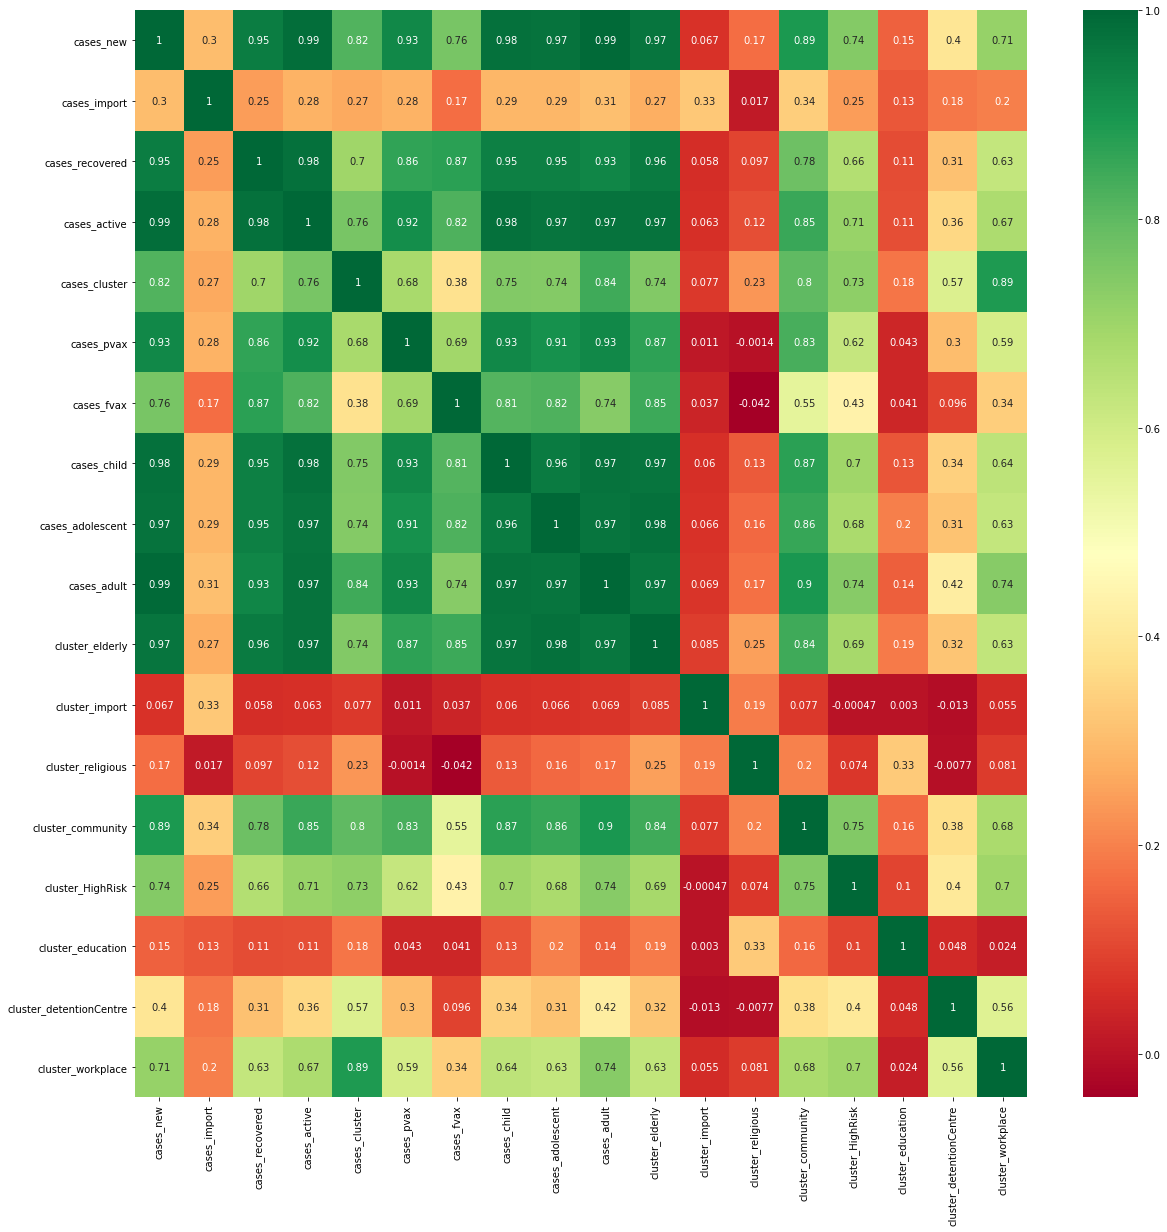

In [76]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [79]:
X=dataset.iloc[:,[11,12]].values

In [80]:
from sklearn.cluster import KMeans

In [81]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


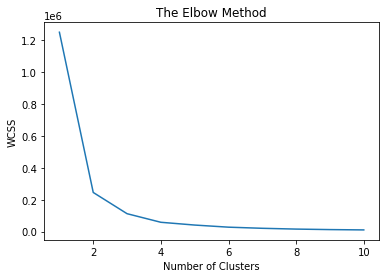

In [82]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

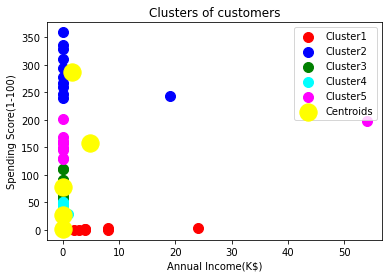

In [84]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')


plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()